# Import the libraries we will need

In [1]:
import pandas as pd
# import numpy as np 

# this is our visualization library's plotting object"
import matplotlib.pyplot as plt 

# this tells our notebook to show our graphs here, instead of a new window
%matplotlib inline 

# basic styling for our graphs; there are other options! 
plt.style.use('ggplot') 

# this is our visualization library (the whole thing!)
import matplotlib 
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Let's read in our data

In [11]:
df = pd.read_csv("data.csv", converters={'Randomized Id': str})
df

,Extract Run Date,UniqueRandomComplaintId,Allegation Id,Allegation FADO Type,Allegation,Case Type,Closed Year,Days From Received Date To Case Closing,Re-opened,Ever On DA Hold,Complaint Outcome Path,Complaint Disposition,Allegation Outcome Path,Allegation Disposition,Borough Of Incident,Patrol Borough Of Incident
0,05/25/2018,1,1,Force,Beat,CCRB,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
1,05/25/2018,1,2,Force,Beat,CCRB,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
2,05/25/2018,1,3,Force,Beat,CCRB,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
3,05/25/2018,2,1,Discourtesy,Curse,CCRB,2000,2433,False,False,Truncated,Complaint Withdrawn,Truncated,Complaint Withdrawn,Manhattan,Manhattan North
4,05/25/2018,3,1,Discourtesy,Curse,CCRB,2000,2445,False,False,Other,Miscellaneous,Other,Miscellaneous,Manhattan,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309255,05/25/2018,104705,1,Force,Chokehold,CCRB,2017,90,False,False,Truncated,Complainant Uncooperative,Truncated,Complainant Uncooperative,Queens,Queens South
309256,05/25/2018,104705,2,Force,Physical force,CCRB,2017,90,False,False,Truncated,Complainant Uncooperative,Truncated,Complainant Uncooperative,Queens,Queens South
309257,05/25/2018,104706,1,Offensive Language,Race,CCRB,2017,25,False,False,Truncated,Complainant Uncooperative,Truncated,Complainant Uncooperative,Brooklyn,Brooklyn South
309258,05/25/2018,104707,1,Discourtesy,Word,CCRB,2017,14,False,False,Truncated,Complainant Uncooperative,Truncated,Complainant Uncooperative,Bronx,Bronx


# Let's learn a bit more about our dataset

In [12]:
df.columns

Index(['Extract Run Date', 'UniqueRandomComplaintId', 'Allegation Id',
       'Allegation FADO Type', 'Allegation', 'Case Type', 'Closed Year',
       'Days From Received Date To Case Closing', 'Re-opened',
       'Ever On DA Hold', 'Complaint Outcome Path', 'Complaint Disposition',
       'Allegation Outcome Path', 'Allegation Disposition',
       'Borough Of Incident', 'Patrol Borough Of Incident'],
      dtype='object')

In [13]:
df.shape

(309260, 16)

# Let's look at the type of allegations and the statuses of the associated complaints.

In [14]:
df["Allegation"].value_counts()

Physical force                           65521
Word                                     46563
Threat of arrest                         16155
Refusal to provide name/shield number    15286
Premises entered and/or searched         14367
                                         ...  
Jewish                                       1
Sexist Remark                                1
White                                        1
Profane Gesture                              1
Restricted Breathing                         1
Name: Allegation, Length: 107, dtype: int64

In [34]:
df["Allegation"].value_counts().head(20)

Physical force                           65521
Word                                     46563
Threat of arrest                         16155
Refusal to provide name/shield number    15286
Premises entered and/or searched         14367
Stop                                     13744
Search (of person)                       13501
Threat of force (verbal or physical)      9932
Question and/or stop                      9436
Frisk                                     7790
Vehicle search                            7174
Vehicle stop                              6900
Gun Pointed                               5157
Other                                     5040
Race                                      4839
Frisk and/or search                       4633
Property damaged                          4544
Pepper spray                              4330
Failure to prepare a memo book entry      4269
Strip-searched                            3633
Name: Allegation, dtype: int64

In [35]:
df["Allegation"].value_counts().tail(20)

Threat of Summons                 7
Slap                              7
Sh Refuse Cmp                     6
Gay/Lesbian Slur                  6
Property Seized                   6
Gun As Club                       6
Force                             4
Flashlight As Club                4
Nightstick/Billy/Club             4
Forcible Removal to Hospital      4
Abuse of Authority                2
Radio As Club                     2
Oriental                          2
Discourtesy                       2
Threat re: removal to hospital    1
Jewish                            1
Sexist Remark                     1
White                             1
Profane Gesture                   1
Restricted Breathing              1
Name: Allegation, dtype: int64

In [17]:
df["Complaint Disposition"].value_counts()

Unsubstantiated                             80530
Complainant Uncooperative                   76592
Unfounded                                   27488
Complaint Withdrawn                         26214
Complainant Unavailable                     18690
Exonerated                                  17627
Substantiated (Charges)                     15889
Alleged Victim Uncooperative                12027
Officer(s) Unidentified                      6045
Mediation Attempted                          5446
Mediated                                     4594
Substantiated (Command Discipline)           3751
Alleged Victim Unavailable                   3536
Substantiated (Formalized Training)          2252
Substantiated (Command Discipline A)         2010
Substantiated (Command Discipline B)         1614
Substantiated (Instructions)                 1216
Victim Unidentified                           904
Administratively Closed                       524
Miscellaneous - Subject Retired               475


In [18]:
df["Allegation Outcome Path"].value_counts()

Full Investigation     144400
Truncated              144321
Other                   10527
Mediation Attempted      5433
Mediated                 4579
Name: Allegation Outcome Path, dtype: int64

In [19]:
df["Allegation Disposition"].value_counts()

Complainant Uncooperative                   74615
Unsubstantiated                             48695
Exonerated                                  47747
Complaint Withdrawn                         24977
Unfounded                                   22479
Complainant Unavailable                     18543
Alleged Victim Uncooperative                17581
Officer(s) Unidentified                     14342
Substantiated (Charges)                      7133
Alleged Victim Unavailable                   6500
Mediation Attempted                          5433
Mediated                                     4579
Other Misconduct                             4268
Other Misconduct (No Rec.)                   1845
Victim Unidentified                          1829
Substantiated (Command Discipline)           1371
Miscellaneous - Subject Retired              1361
Miscellaneous - Subject Resigned              906
Substantiated (Formalized Training)           735
Substantiated (Command Discipline A)          720


In [21]:
df["Ever On DA Hold"].value_counts()

False    308154
True       1106
Name: Ever On DA Hold, dtype: int64

In [23]:
df["Re-opened"].value_counts()

False    305599
True       3661
Name: Re-opened, dtype: int64

In [81]:
df["Closed Year"].value_counts()

2009    25053
2007    24856
2006    22199
2008    21722
2010    20614
2013    20125
2005    19131
2011    17758
2004    16825
2015    16776
2014    16094
2016    14300
2002    13361
2017    12927
2003    12844
2000    12793
2012    12011
2001     9871
Name: Closed Year, dtype: int64

# Filter our dataset based on value in FADO column

In [25]:
force_allegations = df[df["Allegation FADO Type"] == 'Force']
force_allegations

,Extract Run Date,UniqueRandomComplaintId,Allegation Id,Allegation FADO Type,Allegation,Case Type,Closed Year,Days From Received Date To Case Closing,Re-opened,Ever On DA Hold,Complaint Outcome Path,Complaint Disposition,Allegation Outcome Path,Allegation Disposition,Borough Of Incident,Patrol Borough Of Incident
0,05/25/2018,1,1,Force,Beat,CCRB,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
1,05/25/2018,1,2,Force,Beat,CCRB,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
2,05/25/2018,1,3,Force,Beat,CCRB,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
8,05/25/2018,4,3,Force,Physical force,CCRB,2000,490,False,False,Full Investigation,Unfounded,Full Investigation,Unfounded,Queens,Queens North
11,05/25/2018,6,1,Force,Beat,CCRB,2000,489,False,False,Full Investigation,Unsubstantiated,Full Investigation,Exonerated,Manhattan,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309248,05/25/2018,104702,1,Force,Nonlethal restraining device,CCRB,2017,90,False,False,Truncated,Alleged Victim Uncooperative,Truncated,Alleged Victim Uncooperative,Brooklyn,Brooklyn North
309252,05/25/2018,104704,1,Force,Physical force,CCRB,2017,28,False,False,Truncated,Complainant Uncooperative,Truncated,Complainant Unavailable,Brooklyn,Brooklyn North
309254,05/25/2018,104704,3,Force,Pepper spray,CCRB,2017,28,False,False,Truncated,Complainant Uncooperative,Truncated,Complainant Uncooperative,Brooklyn,Brooklyn North
309255,05/25/2018,104705,1,Force,Chokehold,CCRB,2017,90,False,False,Truncated,Complainant Uncooperative,Truncated,Complainant Uncooperative,Queens,Queens South


In [79]:
print("median: ", df['Days From Received Date To Case Closing'].median())
print("mean: ", df['Days From Received Date To Case Closing'].mean())

median:  172.0
mean:  222.67065252538316


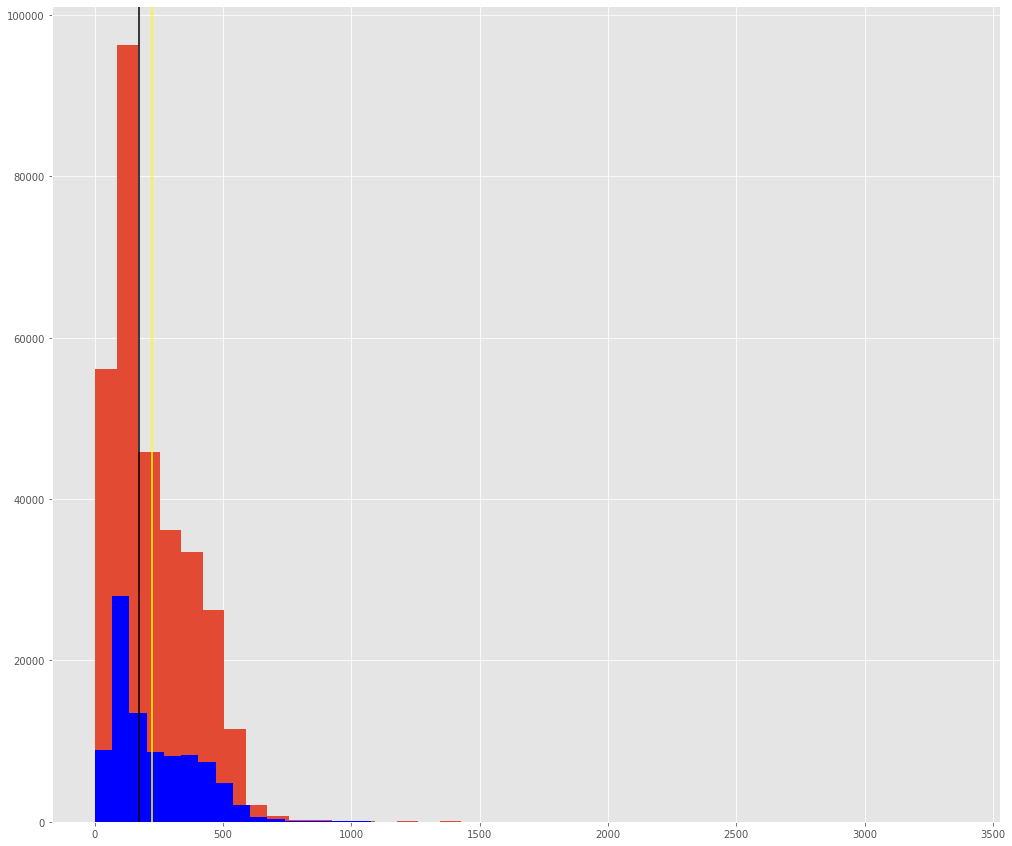

In [78]:
plt.figure(figsize=(17,15))
df['Days From Received Date To Case Closing'].hist(bins=40)
force_allegations['Days From Received Date To Case Closing'].hist(bins=50, color="blue")
plt.axvline(x=df['Days From Received Date To Case Closing'].median(), color="k" )
plt.axvline(x=df['Days From Received Date To Case Closing'].mean(), color="yellow" )

plt.savefig("output/histogram.pdf", transparent=True)
plt.show()

In [48]:
df[df['Days From Received Date To Case Closing'] > 3000]

,Extract Run Date,UniqueRandomComplaintId,Allegation Id,Allegation FADO Type,Allegation,Case Type,Closed Year,Days From Received Date To Case Closing,Re-opened,Ever On DA Hold,Complaint Outcome Path,Complaint Disposition,Allegation Outcome Path,Allegation Disposition,Borough Of Incident,Patrol Borough Of Incident
46698,05/25/2018,17119,1,Abuse of Authority,Retaliatory arrest,CCRB,2003,3024,True,False,Full Investigation,Unfounded,Full Investigation,Exonerated,Brooklyn,Brooklyn North
46699,05/25/2018,17119,2,Force,Physical force,CCRB,2003,3024,True,False,Full Investigation,Unfounded,Full Investigation,Unfounded,Brooklyn,Brooklyn North
46700,05/25/2018,17119,3,Discourtesy,Word,CCRB,2003,3024,True,False,Full Investigation,Unfounded,Full Investigation,Unfounded,Brooklyn,Brooklyn North
135042,05/25/2018,47192,1,Discourtesy,Word,CCRB,2008,3203,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Queens,Queens South
135043,05/25/2018,47192,2,Abuse of Authority,Frisk and/or search,CCRB,2008,3203,False,False,Full Investigation,Unsubstantiated,Other,Miscellaneous - Subject Retired,Queens,Queens South
135044,05/25/2018,47192,3,Abuse of Authority,Question and/or stop,CCRB,2008,3203,False,False,Full Investigation,Unsubstantiated,Full Investigation,Exonerated,Queens,Queens South
135045,05/25/2018,47192,4,Abuse of Authority,Frisk and/or search,CCRB,2008,3203,False,False,Full Investigation,Unsubstantiated,Full Investigation,Exonerated,Queens,Queens South
135046,05/25/2018,47192,5,Force,Physical force,CCRB,2008,3203,False,False,Full Investigation,Unsubstantiated,Full Investigation,Exonerated,Queens,Queens South
135047,05/25/2018,47192,6,Force,Physical force,CCRB,2008,3203,False,False,Full Investigation,Unsubstantiated,Full Investigation,Exonerated,Queens,Queens South
135048,05/25/2018,47192,7,Force,Physical force,CCRB,2008,3203,False,False,Full Investigation,Unsubstantiated,Full Investigation,Officer(s) Unidentified,Queens,Queens South


In [16]:
force_allegations['Allegation'].value_counts()

Physical force                           65521
Gun Pointed                               5157
Pepper spray                              4330
Nightstick as club (incl asp & baton)     3607
Chokehold                                 2997
Hit against inanimate object              2588
Other                                     1495
Handcuffs too tight                       1113
Other blunt instrument as a club           825
Nonlethal restraining device               697
Radio as club                              634
Gun as club                                519
Vehicle                                    477
Flashlight as club                         345
Gun fired                                  312
Police shield                              142
Other - Force                              118
Push/Shove                                 108
Animal                                      69
Punch/Kick                                  65
Beat                                        53
Dragged/Pulle

In [28]:
long_cases = force_allegations[force_allegations['Days From Received Date To Case Closing'] > 1000]
long_cases

,Extract Run Date,UniqueRandomComplaintId,Allegation Id,Allegation FADO Type,Allegation,Case Type,Closed Year,Days From Received Date To Case Closing,Re-opened,Ever On DA Hold,Complaint Outcome Path,Complaint Disposition,Allegation Outcome Path,Allegation Disposition,Borough Of Incident,Patrol Borough Of Incident
0,05/25/2018,1,1,Force,Beat,CCRB,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
1,05/25/2018,1,2,Force,Beat,CCRB,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
2,05/25/2018,1,3,Force,Beat,CCRB,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
12712,05/25/2018,4991,1,Force,Other,CCRB,2000,1023,False,False,Other,Miscellaneous,Other,Miscellaneous,Brooklyn,Brooklyn South
12713,05/25/2018,4991,2,Force,Physical force,CCRB,2000,1023,False,False,Other,Miscellaneous,Other,Miscellaneous,Brooklyn,Brooklyn South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308012,05/25/2018,104328,2,Force,Pepper spray,CCRB,2017,1519,True,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Manhattan,Manhattan North
308013,05/25/2018,104328,3,Force,Nightstick as club (incl asp & baton),CCRB,2017,1519,True,False,Full Investigation,Unsubstantiated,Full Investigation,Unfounded,Manhattan,Manhattan North
308014,05/25/2018,104328,4,Force,Physical force,CCRB,2017,1519,True,False,Full Investigation,Unsubstantiated,Truncated,Alleged Victim Uncooperative,Manhattan,Manhattan North
308025,05/25/2018,104330,1,Force,Physical force,CCRB,2017,1429,True,False,Full Investigation,Exonerated,Full Investigation,Exonerated,Brooklyn,Brooklyn South


In [29]:
long_cases["Patrol Borough Of Incident"].value_counts()

Bronx              76
Manhattan North    43
Brooklyn South     33
Brooklyn North     33
Queens South       17
Queens North       10
Manhattan South     6
Staten Island       5
Name: Patrol Borough Of Incident, dtype: int64

In [30]:
long_cases["Complaint Outcome Path"].value_counts()

Full Investigation    178
Truncated              30
Other                  15
Name: Complaint Outcome Path, dtype: int64

In [31]:
long_cases["Allegation Disposition"].value_counts()

Exonerated                          62
Unsubstantiated                     50
Officer(s) Unidentified             33
Complainant Uncooperative           15
Unfounded                           13
Miscellaneous                       11
Substantiated (Charges)             10
Alleged Victim Uncooperative        10
Complaint Withdrawn                  6
Miscellaneous - Subject Retired      3
Complainant Unavailable              3
Miscellaneous - Subject Resigned     3
Administratively Closed              2
Substantiated (Instructions)         1
Alleged Victim Unavailable           1
Name: Allegation Disposition, dtype: int64

In [32]:
long_cases["Allegation"].value_counts()

Physical force                           95
Gun fired                                44
Pepper spray                             12
Push/Shove                               10
Other                                     8
Gun Pointed                               8
Nightstick as club (incl asp & baton)     7
Chokehold                                 5
Punch/Kick                                5
Gun Fired                                 4
Beat                                      4
Radio as club                             3
Mace                                      3
Flashlight as club                        3
Other - Force                             3
Handcuffs too tight                       2
Police shield                             1
Vehicle                                   1
Other blunt instrument as a club          1
Hit against inanimate object              1
Gun as club                               1
Dragged/Pulled                            1
Slap                            

In [33]:
long_cases["Allegation FADO Type"].value_counts()

Force    223
Name: Allegation FADO Type, dtype: int64

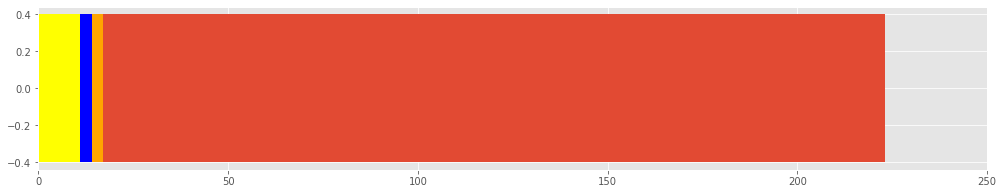

In [70]:
plt.figure(figsize=(17,3))

plt.barh(0, 223)
plt.barh(0, 17, color="orange") # subject retired
plt.barh(0, 14, color="blue") # subject resigned
plt.barh(0, 11, color="yellow") # found substantiated

plt.xlim(0, 250)

plt.savefig("output/stacked_bar.pdf", transparent=True)
plt.show()